<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
 

<strong>Objectives:</strong>
+ Variables significativas para el clustering de productos
    
    
<strong>Conclusions:</strong>

   
</div>

In [1]:
import os, sys

def get_root_path(search_word):
    """ Búsqueda hacia atrás de un directorio con nombre search_word. """
    cwd = os.getcwd()
    while str(os.getcwd()).split('/')[-1] != search_word:
        os.chdir("..")
        cwd = os.getcwd()
    return cwd

ROOT_DIR = get_root_path('TFM_StockForecast')

sys.path.insert(0, ROOT_DIR) # Poner en el primer lugar del PATH (evitar paquetes con mismos nombres en otros directorios)

In [2]:
import pandas as pd
import numpy as np
from src.load_data import load_clustering_data, load_data
from src.prepare_data import prepare_train_data
from src.trainer import data_producto
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
main_df = load_data()

===================  LOAD DATASET stock ====================
Reading CSV in data/raw/03_TablaStock.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 628.
============  CLEAN STOCK  =============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). Rows dropped: 1082
[WARNING] Number of dates missings:                                83
[WARNING] Number of dates missings (droping sundays and festivos): 63
Dataset stock loaded. Shape: (26220, 3)

===================  LOAD DATASET ventas ===================
Reading CSV in data/raw/01_TablaVentas.csv...
=============  CLEAN CSV  ==============
Set columns to lowcase.
Sort values by date.
Dropped duplicates. Rows dropped: 0.
============  CLEAN VENTAS  ============
Dropped rows with data from products with no stock data or out-of-date (descatalogados). Rows dropped: 12467
[WARNING] Number of dates missings:                        

In [10]:
main_df

prod = "30"
data_prod = main_df.loc[main_df.producto == prod]

test = data_prod.loc[data_prod.fecha < '2019-07'].set_index("fecha")

test["test"] = test["udsstock_max"] - test["udsstock_min"] 

test["dif"] = test["udsstock_min"] - test["udsventa"]

test

,producto,udsstock_min,udsstock_max,udsventa,udsprevisionempresa,promo,festivo,test,dif
fecha,,,,,,,,,
2019-06-05,30,964.0,1568.0,738.0,11310.0,0.0,0.0,604.0,226.0
2019-06-06,30,NaN,NaN,944.0,17426.0,0.0,0.0,NaN,NaN
2019-06-07,30,NaN,NaN,836.0,13665.0,0.0,0.0,NaN,NaN
2019-06-08,30,NaN,NaN,295.0,2876.0,0.0,0.0,NaN,NaN
2019-06-09,30,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
2019-06-10,30,NaN,NaN,511.0,5371.0,0.0,0.0,NaN,NaN
2019-06-11,30,647.0,1052.0,541.0,3684.0,0.0,0.0,405.0,106.0
2019-06-12,30,1149.0,1868.0,492.0,1661.0,0.0,0.0,719.0,657.0
2019-06-13,30,1476.0,2400.0,698.0,2900.0,0.0,0.0,924.0,778.0


# Método Naive

In [13]:
prod = "30"
data30 = main_df.loc[main_df.producto == prod]

data30 = data30[['fecha', 'producto', 'udsstock','stockMissingType','roll4wd_udsstock']]

def _get_shifted(prod_data, column, period):
    col_name = column + "_shifted" + str(period) 
    prod_data[col_name] = prod_data[column].shift(periods=period, fill_value=0)
    print("Get shifted variable for {} with period {}".format(column, period))
    return prod_data

data30 = _get_shifted(data30, 'udsstock', period =1)
data30 = _get_shifted(data30, 'udsstock', period =7)

data30 = data30.loc[data30.stockMissingType == 0].set_index("fecha")

data30.columns

Get shifted variable for udsstock with period 1
Get shifted variable for udsstock with period 7


Index(['producto', 'udsstock', 'stockMissingType', 'roll4wd_udsstock',
       'udsstock_shifted1', 'udsstock_shifted7'],
      dtype='object')

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
def get_metrics(actual, pred):
    metrics = {}
    actual, pred = np.array(actual), np.array(pred)
    # Scale dependant metrics
    metrics["mae"] = mean_absolute_error(actual,pred)
    metrics["rmse"] = sqrt(mean_squared_error(actual,pred))

    # Percentage metrics
    metrics["mape"] = np.mean(np.abs(actual - pred) / actual) * 100
    
    metrics["acc"] = 100 - metrics["mape"]
    
    return metrics

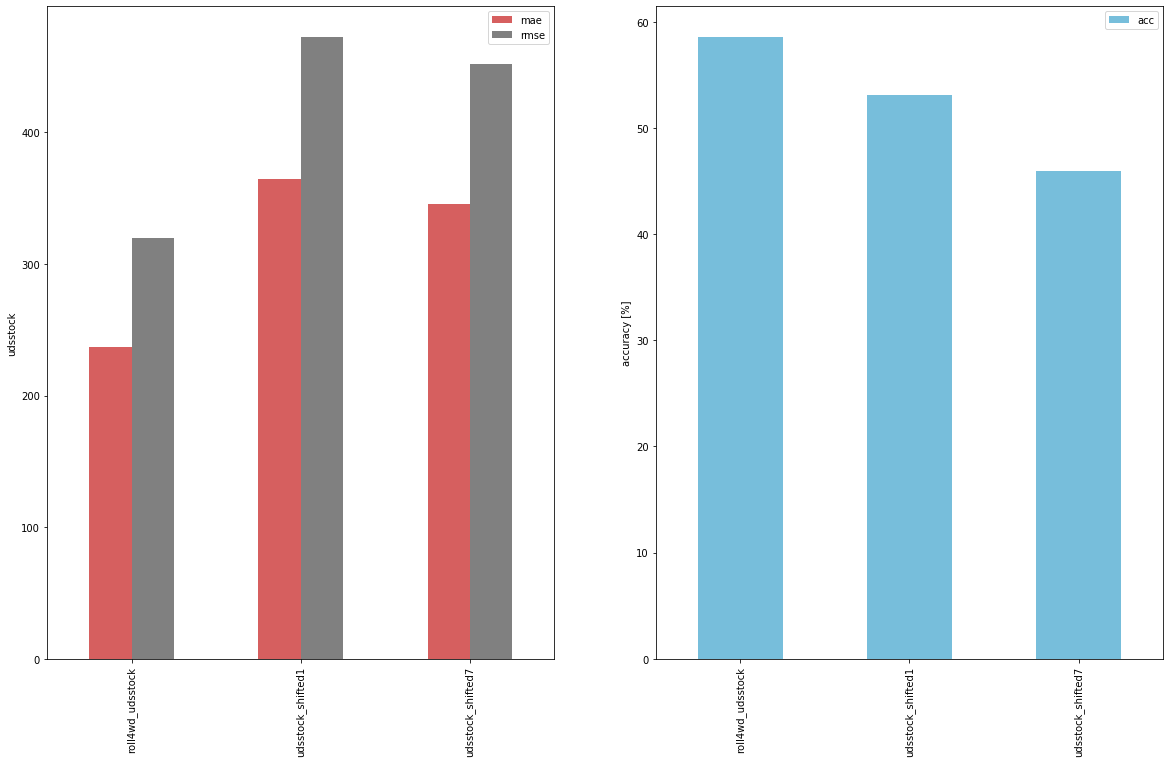

In [88]:
data30 = data30.loc[data30.stockMissingType == 0]

metrics = []
for value in ['roll4wd_udsstock', "udsstock_shifted1", "udsstock_shifted7"]:
    subdata = data30.loc[~data30[value].isna()]
    metric = get_metrics(subdata.udsstock, subdata[value])
    metric["method"] = value
    metrics.append(metric)
    
metrics = pd.DataFrame(metrics).set_index("method")
    
fig, axes = plt.subplots(nrows=1, ncols=2)
metrics[["mae","rmse"]].plot(figsize=(20,12),ax=axes[0], kind='bar', color=["#D65F5F", "grey"])
axes[0].set_ylabel("udsstock")
axes[0].set_xlabel("")
metrics[["acc"]].plot(figsize=(20,12),ax=axes[1], kind='bar', color=["#77BEDB"])
axes[1].set_ylabel("accuracy [%]")
axes[1].set_xlabel("")
plt.savefig("reports/naive/naive_methods.png")

# Entrenamiento de un modelo analitico

In [8]:
from src.trainer import run
from sklearn.ensemble import RandomForestRegressor

def data_producto(data, prod):
    data = data.loc[data.producto == prod]
    data = prepare_train_data(data)

    data = data.loc[data.stockMissingType == 0].reset_index(drop=True)

    data = data[["fecha","producto","udsventa","udsprevisionempresa",
                 'udsstock']]

    # data = data[["fecha","producto","udsventa","udsprevisionempresa",
    #              "promo", "sin_weekday", "cos_weekday",
    #              "quarter", 'month','udsstock','udsprevisionempresa_shifted1', 'udsprevisionempresa_shifted2',
    #             'udsstock_diff7',"udsventa_diff1", "udsstock_shifted-1"]]

    return data

data_prod = data_producto(main_df, "30")

data_prod.head()

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period 1
Get shifted variable for udsprevisionempresa with period 2
Get shifted variable for udsprevisionempresa with period 3
Get shifted variable for udsprevisionempresa with period 4
Get shifted variable 

,fecha,producto,udsventa,udsprevisionempresa,udsstock
0,2019-06-05,30,738.0,11310.0,1266.0
1,2019-06-11,30,541.0,3684.0,849.0
2,2019-06-12,30,492.0,1661.0,1508.0
3,2019-06-13,30,698.0,2900.0,1938.0
4,2019-06-14,30,1033.0,3532.0,1356.0


In [20]:
test = data_prod.loc[data_prod.fecha < '2019-07'].set_index("fecha")[["udsventa","udsstock"]]

test = _get_shifted(test, 'udsstock', period =1)

test['balance'] = test['udsstock_shifted1'] - test['udsventa']

test["pedido"] = test['udsstock'] - test['balance']

test

Get shifted variable for udsstock with period 1


,udsventa,udsstock,udsstock_shifted1,balance,pedido
fecha,,,,,
2019-06-05,738.0,1266.0,0.0,-738.0,2004.0
2019-06-11,541.0,849.0,1266.0,725.0,124.0
2019-06-12,492.0,1508.0,849.0,357.0,1151.0
2019-06-13,698.0,1938.0,1508.0,810.0,1128.0
2019-06-14,1033.0,1356.0,1938.0,905.0,451.0
2019-06-15,354.0,1989.0,1356.0,1002.0,987.0
2019-06-16,0.0,1524.0,1989.0,1989.0,-465.0
2019-06-17,511.0,1524.0,1524.0,1013.0,511.0
2019-06-18,354.0,814.0,1524.0,1170.0,-356.0


In [5]:


def unit_train(data, productos, target="udsstock"):
    tags = {"type":"monoproducto",
            "base_model": "random_forest",
            "target":target}
    params = {"n_estimators":200}
    predict_all = pd.DataFrame({})
    for prod in productos:
        tags["name"] = "PR" + prod
        
        data_prod = data_producto(data, prod)
        
        base_model = RandomForestRegressor(n_estimators=200)
        
        _, _, predict = run(data_prod, target, base_model, params, tags)
        
        predict_all = pd.concat([predict_all, predict])
        
    return predict_all

unit_train(main_df, ["30"])

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period 1
Get shifted variable for udsprevisionempresa with period 2
Get shifted variable for udsprevisionempresa with period 3
Get shifted variable for udsprevisionempresa with period 4
Get shifted variable 

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.2985062599182129 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (20, 2)
**********************************************************************
{'mean_error': -103.8158303699408, 'std_error': 634.9042831159867, 'r2': -0.18433465063880772, 'predict_out': array([0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 3, 1, 0, 1, 1, 0, 1, 1]), 'mae': 536.1031388608284, 'rmse': 652.3382028388994, 'mape': 232.5506153112497, 'smape': 55.32426829513039, 'mase': nan, 'mase_wd': nan, 'train_time': 0.2985062599182129, 'mean_inference_time': 0.0008492350578308105, 'train_size': 175, 'test_size': 20, 'features': 2}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (175, 2)
******************************************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,y_pred,y_real,type,fecha,producto
0,1163.570000,1266.0,train,2019-06-05,30
1,835.495000,849.0,train,2019-06-11,30
2,1290.446786,1508.0,train,2019-06-12,30
3,1742.495000,1938.0,train,2019-06-13,30
4,1300.310000,1356.0,train,2019-06-14,30
...,...,...,...,...,...
190,1461.550000,39.0,test,2020-03-17,30
191,1357.300000,762.0,test,2020-03-19,30
192,1201.515000,1511.0,test,2020-03-20,30
193,1442.077458,2275.0,test,2020-03-21,30


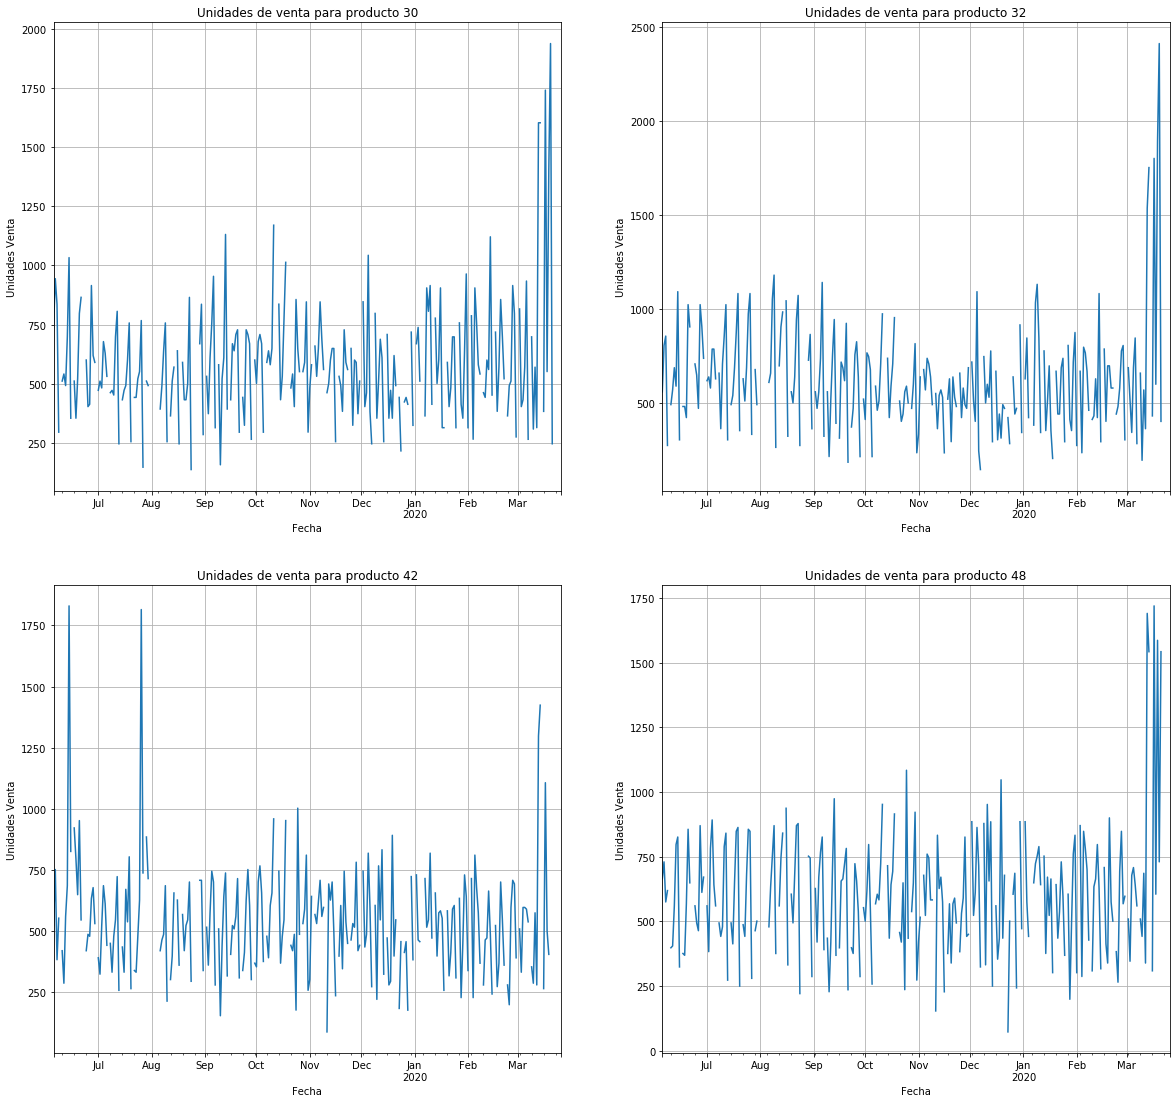

In [7]:
def plot_series2(df):
    df['udsventa'].plot()
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Venta")

plt.figure(figsize=(20,50))

for i, prod in enumerate(["30","32","42","48"]):
    plt.subplot(5,2,i+1)
    prod_data = main_df.loc[main_df.producto == prod].set_index("fecha")
    plot_series2(prod_data)
    plt.title("Unidades de venta para producto {}".format(prod))
    plt.grid(True)
plt.savefig("reports/grupo1/overview_ventas.png")
   

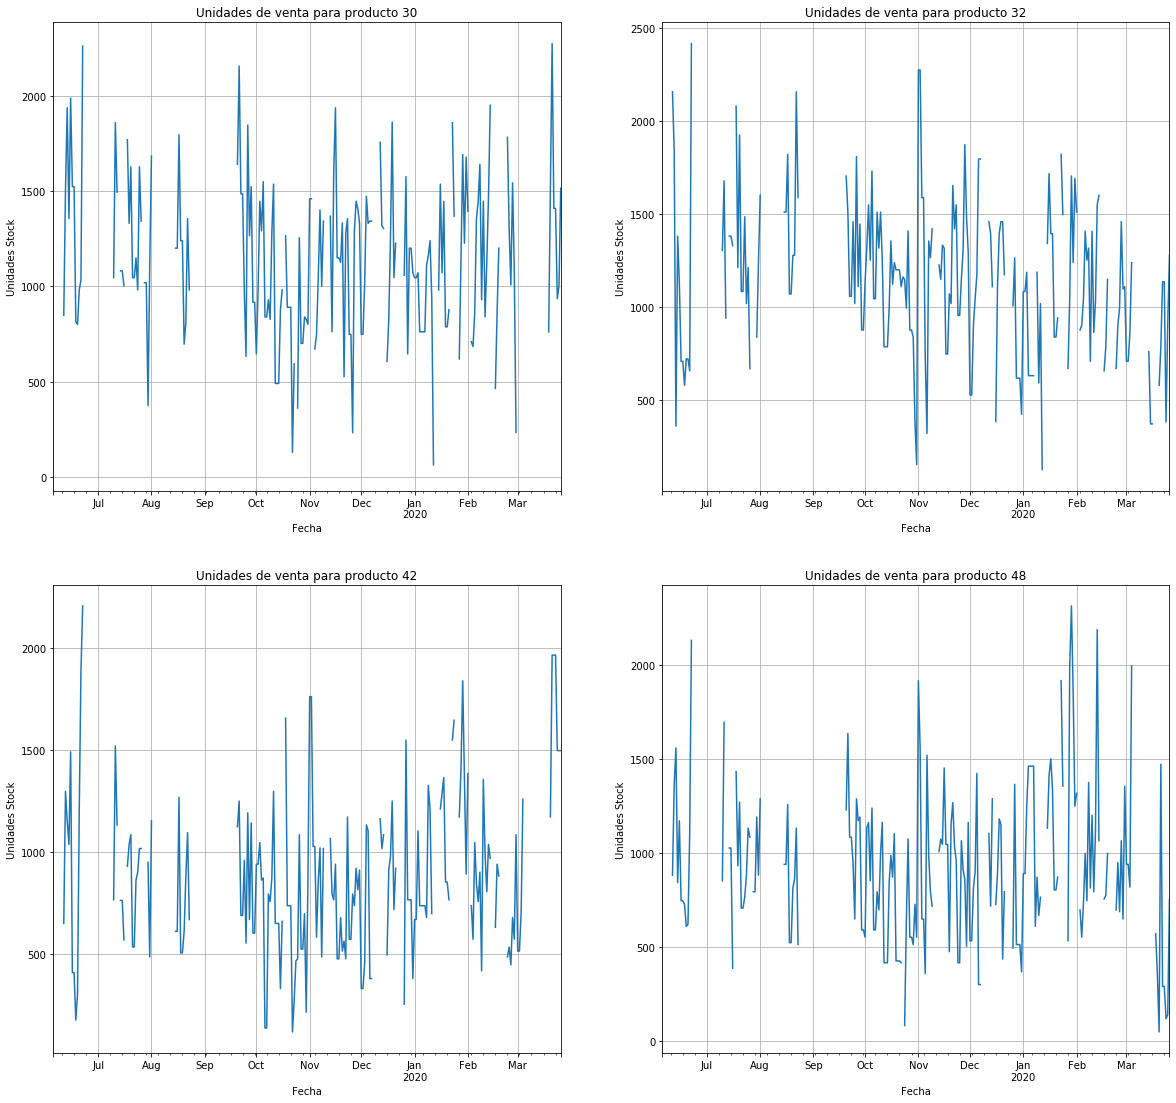

In [8]:

def plot_series2(df):
    df['udsstock'].plot()
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Stock")

plt.figure(figsize=(20,50))

for i, prod in enumerate(["30","32","42","48"]):
    plt.subplot(5,2,i+1)
    prod_data = main_df.loc[main_df.producto == prod].set_index("fecha")
    plot_series2(prod_data)
    plt.title("Unidades de venta para producto {}".format(prod))
    plt.grid(True)
plt.savefig("reports/grupo1/overview_stock.png")

# Entrenamiento producto 30

In [14]:
from src.trainer import data_producto, run
from sklearn.ensemble import RandomForestRegressor

def unit_train(data, productos, target="udsstock"):
    tags = {"type":"monoproducto",
            "base_model": "random_forest",
            "target":target}
    params = {"n_estimators":200}
    predict_all = pd.DataFrame({})
    for prod in productos:
        tags["name"] = "PR" + prod
        
        data_prod = data_producto(data, prod)
        
        base_model = RandomForestRegressor(n_estimators=200)
        
        _, _, predict = run(data_prod, target, base_model, params, tags)
        
        predict_all = pd.concat([predict_all, predict])
        
    return predict_all

def combi_train(data, productos, target="udsstock"):
    tags = {"type":"monoproducto",
            "base_model": "random_forest",
            "target":target,
            "name": "CL_"}
    params = {"n_estimators":200}
    train_data = pd.DataFrame({})
    for prod in productos:
        tags["name"] = tags["name"] + "_" + prod 
        data_prod = data_producto(data, prod)
        
        train_data = pd.concat([train_data, data_prod]).reset_index(drop=True)
    base_model = RandomForestRegressor(n_estimators=200)
    
    train_data = train_data.sort_values(["fecha","producto"]).reset_index(drop=True)
 
    _, _, predict = run(train_data, target, base_model, params, tags)
    
    return predict

In [15]:
unit_predict = unit_train(main_df, ["30","32"])

combi_predict = combi_train(main_df, ["30","32"])

===================  FILTER TRAIN DATA  ====================
Dropped rows corresponding to 23 to 26-03-2020 for not having the ventas data for these days.
Rows dropped: 4
Assigned missings in udsventa.
Assigned missings in udsprevisionempresa filling with 0
Assigning missings for udsstock
Missing in dataset:               97 (292 total rows).
Missings in holiday days:         23 (50 total rows).
Missings in working days:         74 (242 total rows).
Assigned missings for working days data with the 4last wd rolling window - Remaining missings: 29
Assigned left missings for working days data with the mean of the weekday - Remaining missings: 23
Assigned missings for holiday data and no active business data - Remaining missings:      0
Get shifted variable for udsprevisionempresa with period 1
Get shifted variable for udsprevisionempresa with period 2
Get shifted variable for udsprevisionempresa with period 3
Get shifted variable for udsprevisionempresa with period 4
Get shifted variable 

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.38741278648376465 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (30, 12)
**********************************************************************
{'mean_error': 22.05126914862674, 'std_error': 614.3706569267808, 'r2': 0.377196133076239, 'predict_out': array([1, 1, 1, 1, 1, 1, 0, 1, 5, 3, 1, 1, 1, 1, 4, 1, 1, 1, 4, 2, 1, 1,
       1, 1, 1, 0, 0, 1, 4, 1]), 'mae': 299.31393160567774, 'rmse': 381.08278648341684, 'mape': 155.31453786466162, 'smape': 49.99933287130937, 'mase': nan, 'mase_wd': nan, 'train_time': 0.38741278648376465, 'mean_inference_time': 0.0005377451578776042, 'train_size': 262, 'test_size': 30, 'features': 12}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (262, 12)
*

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Model trained in 0.4198567867279053 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (53, 12)
**********************************************************************
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (209, 12)
**********************************************************************
Model trained in 0.38336610794067383 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (53, 12)
*****************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.345170259475708 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (30, 12)
**********************************************************************
{'mean_error': -84.0470026651512, 'std_error': 398.74472215021376, 'r2': 0.6390313063035687, 'predict_out': array([2, 0, 0, 0, 0, 5, 2, 2, 0, 0, 2, 2, 2, 7, 5, 0, 0, 0, 0, 2, 2, 0,
       9, 6, 0, 0, 0, 0, 2, 0]), 'mae': 132.4625196181215, 'rmse': 179.13912711784621, 'mape': 42.83971884248483, 'smape': 33.992650206772986, 'mase': nan, 'mase_wd': nan, 'train_time': 0.345170259475708, 'mean_inference_time': 0.0005084117253621419, 'train_size': 262, 'test_size': 30, 'features': 12}
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (262, 12)
****

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Model trained in 0.48830246925354004 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (105, 12)
**********************************************************************
===============================  TRAINING MODEL  ===============================
Starting training...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (420, 12)
**********************************************************************
Model trained in 0.4899895191192627 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (105, 12)
***************

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)


Model trained in 0.5365304946899414 s.
===============================  VALIDATE MODEL  ===============================
Evaluating productive model...
****************************  NORMALIZE  *****************************
- Normalizing predictor variables...
Data normalized. Data size: (59, 12)
**********************************************************************
{'mean_error': -50.98885277544989, 'std_error': 523.1508518849195, 'r2': 0.5175415391434592, 'predict_out': array([ 4,  4,  3,  3,  1,  2,  1,  1,  1,  6,  6,  2,  3,  1,  3,  4,  3,
        3,  1,  3,  1,  1,  3,  4,  4,  6,  6, 28,  6,  1,  1,  1,  1,  3,
        1,  6,  1,  6,  6,  2,  2,  3,  2,  1,  3,  1,  1,  3,  1,  2,  2,
        1,  2,  6,  1, 13,  6,  1,  2]), 'mae': 204.07356859809107, 'rmse': 282.90604625286227, 'mape': 101.1968902151531, 'smape': 41.847483770419444, 'mase': nan, 'mase_wd': nan, 'train_time': 0.5365304946899414, 'mean_inference_time': 0.00026926347764871886, 'train_size': 525, 'test_size': 59, 'f

/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/plombao/miniconda3/envs/ds/lib/python3.8/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [12]:
test

,y_pred_x,y_real_x,type_x,fecha,producto,y_pred_y,y_real_y,type_y
0,1183.459516,1266.000000,train,2019-06-05,30,1074.334038,1266.000000,train
1,1374.095259,1378.633333,train,2019-06-06,30,1372.132642,1378.633333,train
2,1323.773623,1301.896552,train,2019-06-07,30,1307.565260,1301.896552,train
3,1441.221350,1432.423077,train,2019-06-08,30,1427.138192,1432.423077,train
4,969.320548,985.920000,train,2019-06-09,30,956.778916,985.920000,train
...,...,...,...,...,...,...,...,...
579,1080.293190,1113.433333,test,2020-03-18,32,1093.664083,1113.433333,test
580,1109.541299,1366.700000,test,2020-03-19,32,1278.991732,1366.700000,test
581,973.330581,581.000000,test,2020-03-20,32,873.971860,581.000000,test
582,1336.505551,788.000000,test,2020-03-21,32,1454.530303,788.000000,test


In [16]:
test = unit_predict.merge(combi_predict, on=["fecha","producto"])

test.loc[test.type_x != test.type_y]

,y_pred_x,y_real_x,type_x,fecha,producto,y_pred_y,y_real_y,type_y
262,1349.31006,1432.423077,test,2020-02-22,30,1421.586486,1432.423077,train


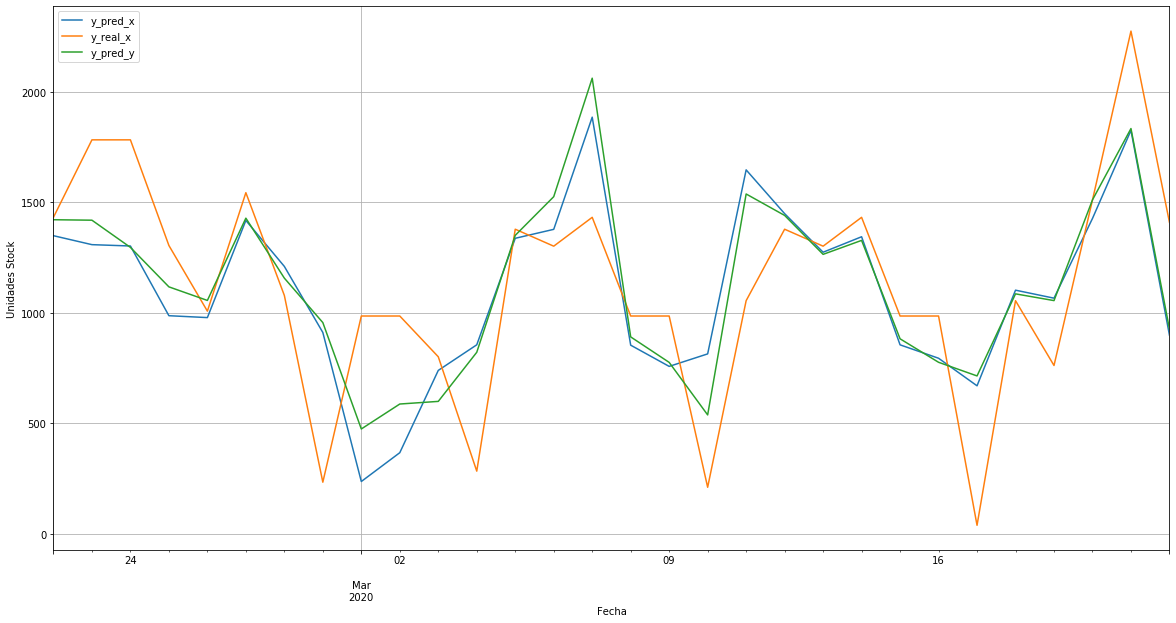

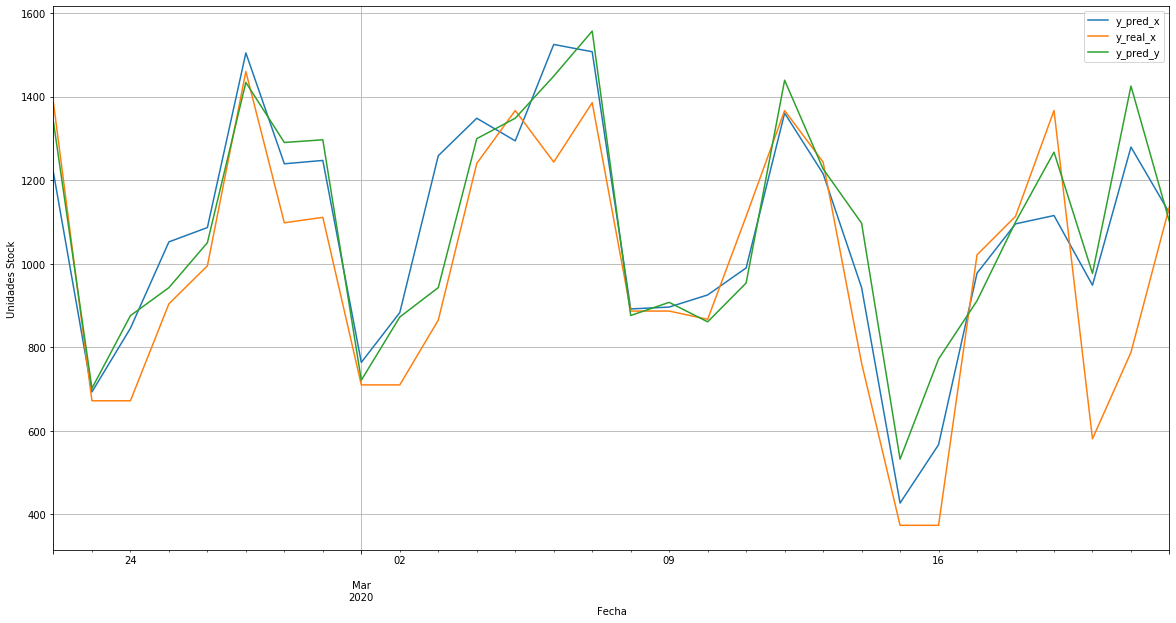

In [19]:
for prod in ["30","32"]:
    test_pr = test.loc[test.producto == prod].set_index("fecha")

    test_pr.loc[test_pr.type_x == "test", ["y_pred_x", "y_real_x", "y_pred_y"]].plot(figsize=(20,10))
    plt.xlabel("Fecha")
    plt.ylabel("Unidades Stock")
    plt.grid()
    plt.show()

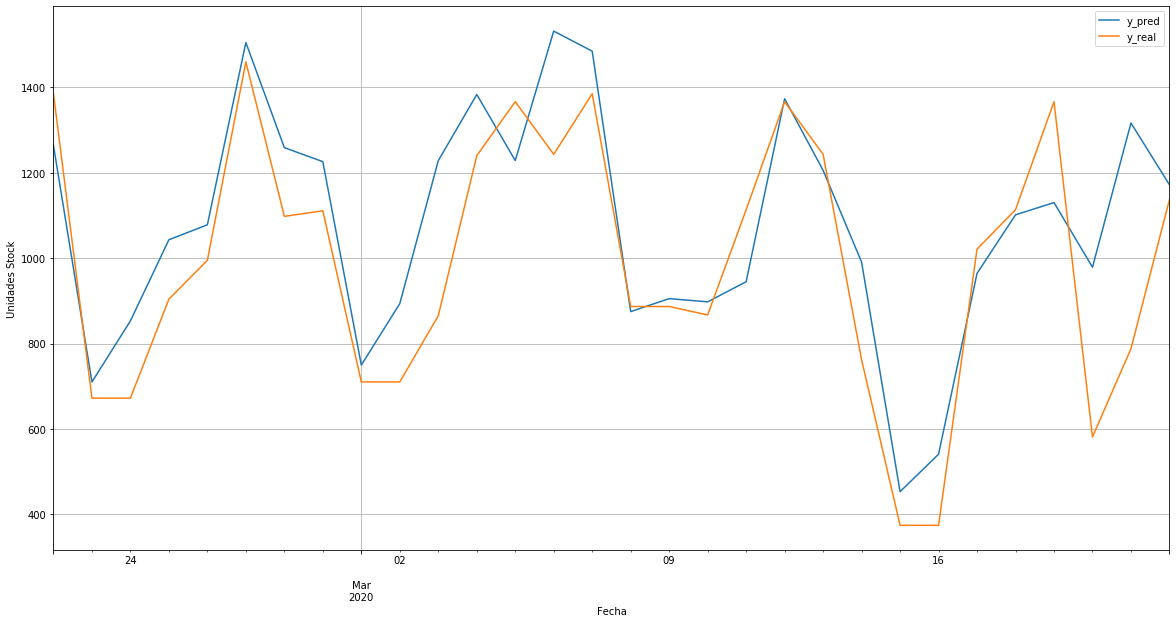

In [39]:
predict.loc[predict.type == "test"].plot(figsize=(20,10))
plt.xlabel("Fecha")
plt.ylabel("Unidades Stock")
plt.grid()

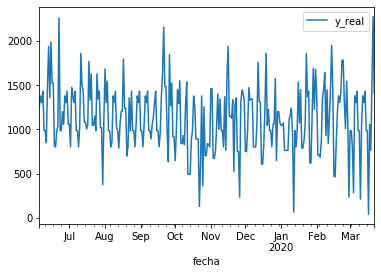

In [30]:
predict[['y_real']].plot(label='observed')
predict.y_pred.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))